In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
final_fig_path = "../Manuscript/Figures/"

In [3]:
np.exp(1)

2.718281828459045

In [83]:
'''
Functional response to a prey type
the number of prey caught per predator group
i indicates which prey, 1 = big prey, 2 = small prey
'''
def fun_response(x,M1,M2,i,h1,h2,a1,a2,α1_of_1, α2_of_1, s1, s2):
    α1 = attackrate_sigmoid1(x,α1_of_1,s1)
    α2 = attackrate_sigmoid1(x,α2_of_1, s2)
    
    if i == 1:
        numerator = M1*a1*α1
    elif i == 2:
        numerator = M2*a2*α2
    else:
        print("Invalid prey type i")
    denominator = 1 + h1*α1*M1 + h2*α2*M2
    return numerator/denominator

def capture_probability(x, α_of_1, s):
    θ = - np.log(1/α_of_1 - 1)/(1-s)
    return 1/(1+np.exp(-θ*(x-s)))
    
'''
the sigmoidal attack rate
This is the option that uses e
'''
'''def attackrate_sigmoid1(x,a,θ,x0):
    return a/(1+np.exp(-θ*(x-x0)))
'''
'''

Finds the capture probability for one given parameter, and the desired capture probability if x = 1
param_to_find = 'θ' or 's'
'''
def capture_prob_set_α_of_1(x, α_of_1, param, param_to_find):
    if param_to_find == 'θ':
        s = param
        if s == 1: 
            print('s needs to be larger than 1')
        θ = - np.log(1/α_of_1 - 1)/(1-s)
    elif param_to_find == 's':
        θ = param
        s = 1 + np.log(1/α_of_1 - 1)/(θ)
    else:
        print('invalid param_to_find')
    return 1/(1+np.exp(-θ*(x-s)))
    

# Capture Probabilities if we control $\alpha(1)$

## Big prey

Text(0, 0.5, '$\\alpha_1(x)$')

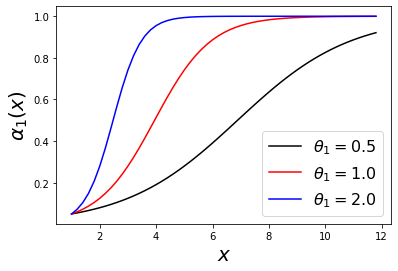

In [100]:
param_to_find = 's'
param_vec = [0.5,1,2]
colors = ['k','r','b']
linelabel = r'$\theta_1 = $'
x = np.arange(1,12,0.2)
α_of_1 = 0.05
for i,param in enumerate(param_vec):
    α_of_x = capture_prob_set_α_of_1(x, α_of_1, param, param_to_find)
    plt.plot(x,α_of_x, label = linelabel + '%.1f'%param, c = colors[i])
plt.legend(fontsize = 16)
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel(r'$\alpha_1(x)$',fontsize = 20)

Text(0, 0.5, '$\\alpha_1(x)$')

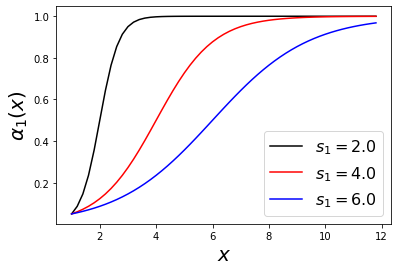

In [102]:
param_to_find = 'θ'
param_vec = [2,4,6]
colors = ['k','r','b']
linelabel = r'$s_1 = $'
x = np.arange(1,12,0.2)
α_of_1 = 0.05

for i,param in enumerate(param_vec):
    α_of_x = capture_prob_set_α_of_1(x, α_of_1, param, param_to_find)
    plt.plot(x,α_of_x, label = linelabel + '%.1f'%param, c = colors[i])
plt.legend(fontsize = 16)
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel(r'$\alpha_1(x)$',fontsize = 20)

## Small Prey

Text(0, 0.5, '$\\alpha_2(x)$')

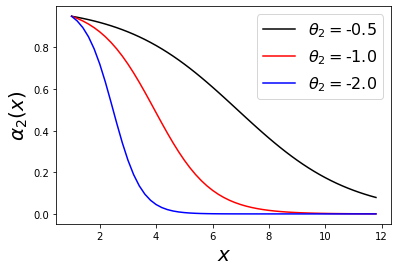

In [103]:
param_to_find = 's'
param_vec = [-0.5,-1,-2]
colors = ['k','r','b']
linelabel = r'$\theta_2 = $'
x = np.arange(1,12,0.2)
α_of_1 = 0.95
for i,param in enumerate(param_vec):
    α_of_x = capture_prob_set_α_of_1(x, α_of_1, param, param_to_find)
    plt.plot(x,α_of_x, label = linelabel + '%.1f'%param, c = colors[i])
plt.legend(fontsize = 16)
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel(r'$\alpha_2(x)$',fontsize = 20)


Text(0, 0.5, '$\\alpha_2(x)$')

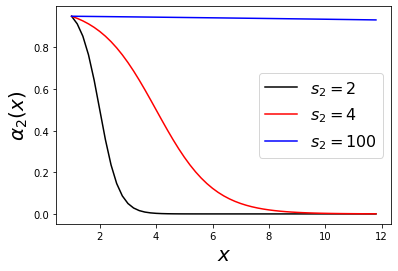

In [108]:
param_to_find = 'θ'
param_vec = [2,4,100]
colors = ['k','r','b']
linelabel = r'$s_2 = $'
x = np.arange(1,12,0.2)
α_of_1 = 0.95

for i,param in enumerate(param_vec):
    α_of_x = capture_prob_set_α_of_1(x, α_of_1, param, param_to_find)
    plt.plot(x,α_of_x, label = linelabel + '%d'%param, c = colors[i])
plt.legend(fontsize = 16)
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel(r'$\alpha_2(x)$',fontsize = 20)

Text(0, 0.5, '$\\theta_2$')

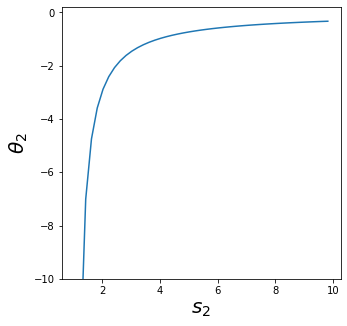

In [55]:
plt.subplots(1,1,figsize = (5,5))
ϵ = 0.05
s1 = np.arange(1.02,10,0.2)
plt.plot(s1,  np.log(1/ϵ - 1)/(1-s1) )
plt.ylim([-10,0.2])
plt.xlabel(r'$s_2$', fontsize = 20)
plt.ylabel(r'$\theta_2$', fontsize = 20)

 # Capture Prob. of Prey type I

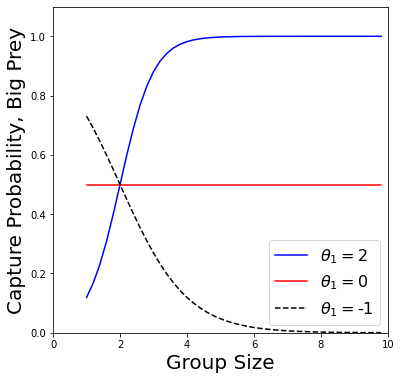

In [40]:
x_inputs = np.arange(1,10,0.2)
x0 = 2
a = 1

plt.figure(figsize=(6,6))
θ_a = 2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_a,x0), '-b', label = r'$\theta_1 =$%d'%θ_a)

θ_b = 0
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_b,x0), 'r', label = r'$\theta_1 =$%d'%θ_b)

θ_c = -1
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_c,x0), '--k', label = r'$\theta_1 =$%d'%θ_c)

plt.xlabel('Group Size', fontsize = 20)
plt.ylabel('Capture Probability, Big Prey', fontsize = 20)
plt.ylim(0,1.1)
plt.xlim([0,10])
plt.legend(fontsize=16)

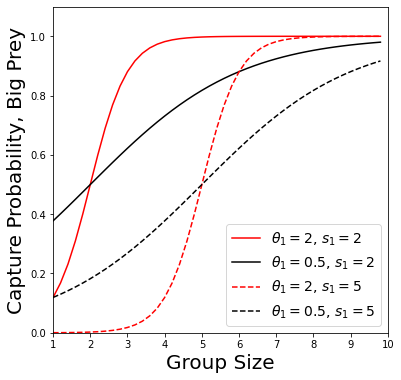

In [36]:
x_inputs = np.arange(1,10,0.2)
x0 = 2
a = 1

plt.figure(figsize=(6,6))
θ= 2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'r', label = r'$\theta_1 =$%d, $s_1 =$%d'%(θ, x0))

#θ = 1
#plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_b,x0), 'r', label = r'$\theta_1 =$%d, $s_1 =$%d'%(θ, x0))

θ = 0.5
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'k', label = r'$\theta_1 =$%.1f, $s_1 =$%d'%(θ, x0))

x0 = 5
θ= 2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), '--r', label = r'$\theta_1 =$%d, $s_1 =$%d'%(θ, x0))

#θ = 1
#plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_b,x0), '--r', label = r'$\theta_1 =$%d, $s_1 =$%d'%(θ, x0))

θ = 0.5; 
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), '--k', label = r'$\theta_1 =$%.1f, $s_1 =$%d'%(θ, x0))

plt.xlabel('Group Size', fontsize = 20)
plt.ylabel('Capture Probability, Big Prey', fontsize = 20)
plt.ylim(0,1.1)
plt.xlim([1,10])
plt.legend(fontsize=14)

plt.savefig(final_fig_path+'capturerate_bigprey.png', bbox_inches = 'tight')

# Capture Prob Small Prey

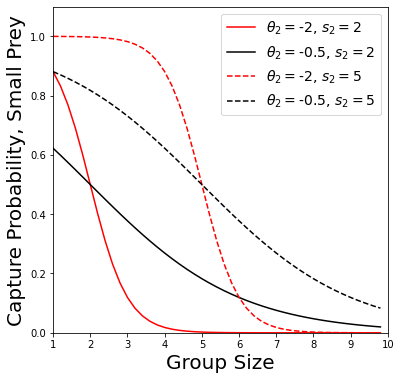

In [34]:
x_inputs = np.arange(1,10,0.2)
x0 = 2
a = 1

plt.figure(figsize=(6,6))
θ= -2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'r', label = r'$\theta_2 =$%d, $s_2 =$%d'%(θ, x0))

#θ = 1
#plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_b,x0), 'r', label = r'$\theta_1 =$%d, $s_1 =$%d'%(θ, x0))

θ = -0.5
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'k', label = r'$\theta_2 =$%.1f, $s_2 =$%d'%(θ, x0))

x0 = 5
θ= -2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), '--r', label = r'$\theta_2 =$%d, $s_2 =$%d'%(θ, x0))

#θ = 1
#plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_b,x0), '--r', label = r'$\theta_1 =$%d, $s_1 =$%d'%(θ, x0))

θ = -0.5; 
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), '--k', label = r'$\theta_2 =$%.1f, $s_2 =$%d'%(θ, x0))

plt.xlabel('Group Size', fontsize = 20)
plt.ylabel('Capture Probability, Small Prey', fontsize = 20)
plt.ylim(0,1.1)
plt.xlim([1,10])
plt.legend(fontsize=14)

plt.savefig(final_fig_path+'capturerate_smallprey.png', bbox_inches = 'tight')

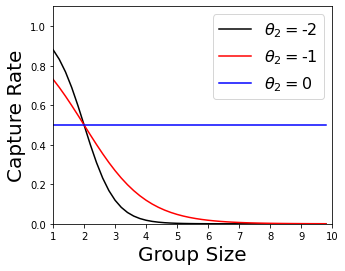

In [8]:
x_inputs = np.arange(1,10,0.2)
x0 = 2
a = 1

plt.figure(figsize=(5,4))
θ = -2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'k', label = r'$\theta_2 =$%d'%θ)

θ = -1
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'r', label = r'$\theta_2 =$%d'%θ)

θ = 0
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'b', label = r'$\theta_2 =$%d'%θ)

plt.xlabel('Group Size', fontsize = 20)
plt.ylabel('Capture Rate', fontsize = 20)
plt.ylim(0,1.1)
plt.xlim([1,10])
plt.legend(fontsize=16)

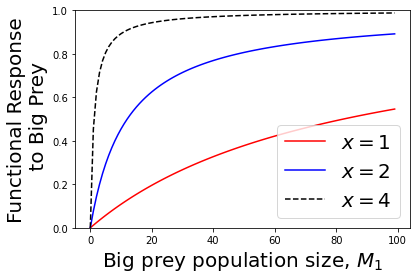

In [6]:
x_inputs = np.arange(1,10,1)
M1 = np.arange(0,100,1)
M2 = 10
i = 1
h1 = 1
h2 = 1
a1 = 1
a2 = 1
θ1 = 2
θ2 = -2
x0 = 2


x=1
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'r', label = r'$x=$%d'%x)

x=2
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'b', label = r'$x=$%d'%x)

x=4
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'--k', label = r'$x=$%d'%x)
plt.ylim([0,1])
plt.legend(fontsize=20)
plt.xlabel(r'Big prey population size, $M_1$', fontsize = 20)
plt.ylabel('Functional Response\n to Big Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Fun_response_1_theta_2_neg2.png', bbox_inches = 'tight')

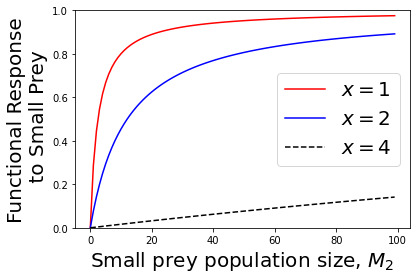

In [7]:
M1 = 10
M2 = np.arange(0,100,1)
i=2
x=1
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'r', label = r'$x=$%d'%x)

x=2
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'b', label = r'$x=$%d'%x)

x=4
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'--k', label = r'$x=$%d'%x)

plt.legend(fontsize=20)
plt.ylim([0,1])
plt.xlabel(r'Small prey population size, $M_2$', fontsize = 20)
plt.ylabel('Functional Response\n to Small Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Fun_response_2_theta_2_neg2.png', bbox_inches = 'tight')

# Now we want per-individual capture rate from each prey type, after even sharing

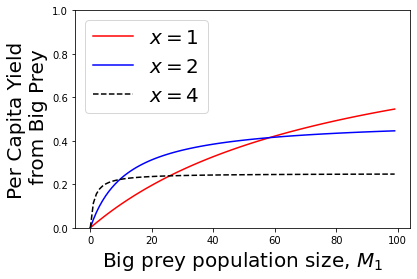

In [37]:
x_inputs = np.arange(1,10,1)
M1 = np.arange(0,100,1)
M2 = 10
i = 1
h1 = 1
h2 = 1
a1 = 1
a2 = 1
θ1 = 2
θ2 = -2
x0 = 2


x=1
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'r', label = r'$x=$%d'%x)

x=2
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'b', label = r'$x=$%d'%x)

x=4
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'--k', label = r'$x=$%d'%x)
plt.ylim([0,1])
plt.legend(fontsize=20)
plt.xlabel(r'Big prey population size, $M_1$', fontsize = 20)
plt.ylabel('Per Capita Yield\n from Big Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Yield_perpred_1_theta_2_neg2.png', bbox_inches = 'tight')

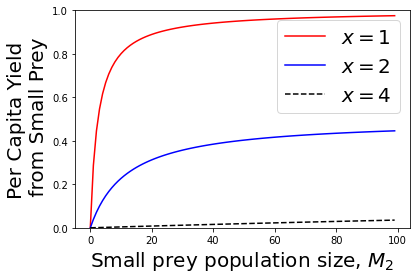

In [38]:
M1 = 10
M2 = np.arange(0,100,1)
i=2
x=1
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'r', label = r'$x=$%d'%x)

x=2
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'b', label = r'$x=$%d'%x)

x=4
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'--k', label = r'$x=$%d'%x)

plt.legend(fontsize=20)
plt.ylim([0,1])
plt.xlabel(r'Small prey population size, $M_2$', fontsize = 20)
plt.ylabel('Per Capita Yield\n from Small Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Yield_perpred_2_theta_2_neg2.png', bbox_inches = 'tight')

Effective Yields per Group Size

In [9]:
# plot the Y1/x, Y2/x, and (Y1/(Y1+Y2))/x, and then (1/x)\bar{w} for different group sizes, varying theta1, theta2, and then s_1, s_2

Yield versus group size




In [39]:

h1 = 1
h2 = 1

a1 = 1
a2 = 1

θ1 = 2
θ2 = -2

x0 = 2

s1 values = []
s2 = 2